## TENTANG DATA

Dataset ini memberikan gambaran yang komprehensif tentang harga Airbnb di beberapa kota Eropa yang paling populer. Setiap daftar dinilai untuk berbagai atribut seperti jenis kamar, peringkat kebersihan dan kepuasan, kamar tidur, jarak dari pusat kota, dan banyak lagi untuk menangkap pemahaman mendalam tentang harga Airbnb pada hari kerja dan akhir pekan. Dengan menggunakan metode ekonometrik spasial, kami menganalisis dan mengidentifikasi faktor-faktor yang menentukan harga Airbnb di kota-kota ini. Dataset kami mencakup informasi seperti realSum (harga total daftar), room_type (private/shared/entire home/apt), host_is_superhost (nilai boolean yang menunjukkan apakah host adalah superhost atau tidak), multi (indikator apakah daftar adalah untuk beberapa kamar atau bukan), biz (indikasi bisnis), guest_satisfaction_overall (peringkat keseluruhan dari tamu berkemah semua daftar yang ditawarkan oleh host ), kamar tidur, dist (jarak dari pusat kota), koordinat lng & lat untuk identifikasi lokasi, dll. 

Deskripsi kolom dataset:

| Column Name | Description | Data Type |
|-------------|-------------|-----------|
| realSum | The total price of the Airbnb listing | (Numeric) |
| room_type | The type of room being offered (e.g. private, shared, etc.) | (Categorical) |
| room_shared | Whether the room is shared or not | (Boolean) |
| room_private | Whether the room is private or not | (Boolean) |
| person_capacity | The maximum number of people that can stay in the room | (Numeric) |
| host_is_superhost	| Whether the host is a superhost or not | (Boolean) |
| multi | Whether the listing is for multiple rooms or not | (Boolean) |
| biz | Whether the listing is for business purposes or not | (Boolean) |
| cleanliness_rating | The cleanliness rating of the listing | (Numeric) |
| guest_satisfaction_overall | The overall guest satisfaction rating of the listing | (Numeric) |
| bedrooms | The number of bedrooms in the listing | (Numeric) |
| dist | The distance from the city centre | (Numeric) |
| metro_dist | The distance from the nearest metro station | (Numeric) |
| lng | The longitude of the listing | (Numeric) |
| lat | The latitude of the listing | (Numeric) |

## GOAL

Tujuan dari proyek ini adalah untuk menerapkan metode klasifikasi Adaboost dalam menentukan apakah suatu data termasuk kategori weekend atau weekday

### 1. Importing Data

In [13]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse


import statsmodels.api as sm
from scipy import stats
import warnings
warnings.filterwarnings("ignore")  

In [221]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive/COFI/Project Week 5"

Budapest_airbnb.csv  london_weekends.csv   Part3_Project5.ipynb
Lisbon_airbnb.csv    Part1_Project5.ipynb
London_airbnb.csv    Part2_Project5.ipynb


In [14]:
df = pd.read_csv("London_airbnb.csv") 

In [6]:
df['realSum'].nunique()

2410

In [8]:
print(df.groupby('status')['realSum'].nunique())

status
Weekdays    1752
Weekend     1605
Name: realSum, dtype: int64


In [56]:
df

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,status
0,0,388.061808,Entire home/apt,False,False,4.0,False,1,0,8.0,...,2,6.732503,2.022072,176.923962,12.298674,381.906786,6.835466,-0.05051,51.54512,Weekend
1,1,217.784990,Private room,False,True,2.0,False,1,0,9.0,...,2,6.948120,2.168112,182.474049,12.683974,353.311266,6.326333,-0.03810,51.48032,Weekdays
2,2,308.567934,Private room,False,True,4.0,False,0,1,9.0,...,0,4.913163,0.488135,286.846684,19.939031,575.069013,10.297091,-0.05760,51.51516,Weekdays
3,3,194.030904,Private room,False,True,2.0,False,1,0,9.0,...,1,6.360935,0.514938,206.000027,14.319865,523.235327,9.365001,-0.21908,51.50661,Weekend
4,4,439.568193,Entire home/apt,False,False,2.0,False,1,0,9.0,...,1,3.871620,1.222868,286.180624,19.893531,518.458762,9.279508,-0.09147,51.48178,Weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,9988,195.912416,Private room,False,True,2.0,True,0,0,10.0,...,1,6.376057,1.259077,172.721349,12.006534,358.983394,6.425177,-0.11725,51.45138,Weekend
9989,9989,154.989534,Private room,False,True,2.0,False,0,0,9.0,...,1,7.282685,1.750548,155.410893,10.803217,346.361730,6.199271,-0.18669,51.45430,Weekend
9990,9990,204.379219,Private room,False,True,2.0,False,0,1,8.0,...,1,8.652983,0.701585,129.083842,8.972761,290.395222,5.199769,-0.16900,51.43500,Weekdays
9991,9991,1288.600390,Private room,False,True,2.0,False,1,0,9.0,...,1,4.954088,0.661841,253.950263,17.653073,566.923874,10.146950,-0.06452,51.52925,Weekend


In [15]:
df= df.drop(['Unnamed: 0'], axis= 1)  
df

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,status
0,388.061808,Entire home/apt,False,False,4.0,False,1,0,8.0,80.0,2,6.732503,2.022072,176.923962,12.298674,381.906786,6.835466,-0.05051,51.54512,Weekend
1,217.784990,Private room,False,True,2.0,False,1,0,9.0,93.0,2,6.948120,2.168112,182.474049,12.683974,353.311266,6.326333,-0.03810,51.48032,Weekdays
2,308.567934,Private room,False,True,4.0,False,0,1,9.0,90.0,0,4.913163,0.488135,286.846684,19.939031,575.069013,10.297091,-0.05760,51.51516,Weekdays
3,194.030904,Private room,False,True,2.0,False,1,0,9.0,89.0,1,6.360935,0.514938,206.000027,14.319865,523.235327,9.365001,-0.21908,51.50661,Weekend
4,439.568193,Entire home/apt,False,False,2.0,False,1,0,9.0,80.0,1,3.871620,1.222868,286.180624,19.893531,518.458762,9.279508,-0.09147,51.48178,Weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,195.912416,Private room,False,True,2.0,True,0,0,10.0,99.0,1,6.376057,1.259077,172.721349,12.006534,358.983394,6.425177,-0.11725,51.45138,Weekend
9989,154.989534,Private room,False,True,2.0,False,0,0,9.0,91.0,1,7.282685,1.750548,155.410893,10.803217,346.361730,6.199271,-0.18669,51.45430,Weekend
9990,204.379219,Private room,False,True,2.0,False,0,1,8.0,84.0,1,8.652983,0.701585,129.083842,8.972761,290.395222,5.199769,-0.16900,51.43500,Weekdays
9991,1288.600390,Private room,False,True,2.0,False,1,0,9.0,97.0,1,4.954088,0.661841,253.950263,17.653073,566.923874,10.146950,-0.06452,51.52925,Weekend


### 2. Exploratory Data Analysis (EDA)

In [1]:
df.groupby('status').size().plot(kind='pie', autopct='%.2f')

NameError: name 'df' is not defined

- Proporsi antara data Weekend dan Weekdays hampir seimbang dengan Weekend lebih dominan.

In [17]:
# plt.figure(figsize=(12, 8))
# ax = plt.subplot()
# plt.axis([0,8,0,1500])
# sns.set_theme(style='ticks', palette='pastel')
# sns.boxplot(x="status", y="realSum", 
#             data=df, fliersize=0.5, linewidth=1)
# # ax.set_xticklabels(ranks)
# plt.grid(axis='y', color='#E8E8E8', linestyle='--', linewidth=.5)
# plt.legend(loc=1)
# plt.show()
# plt.clf()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


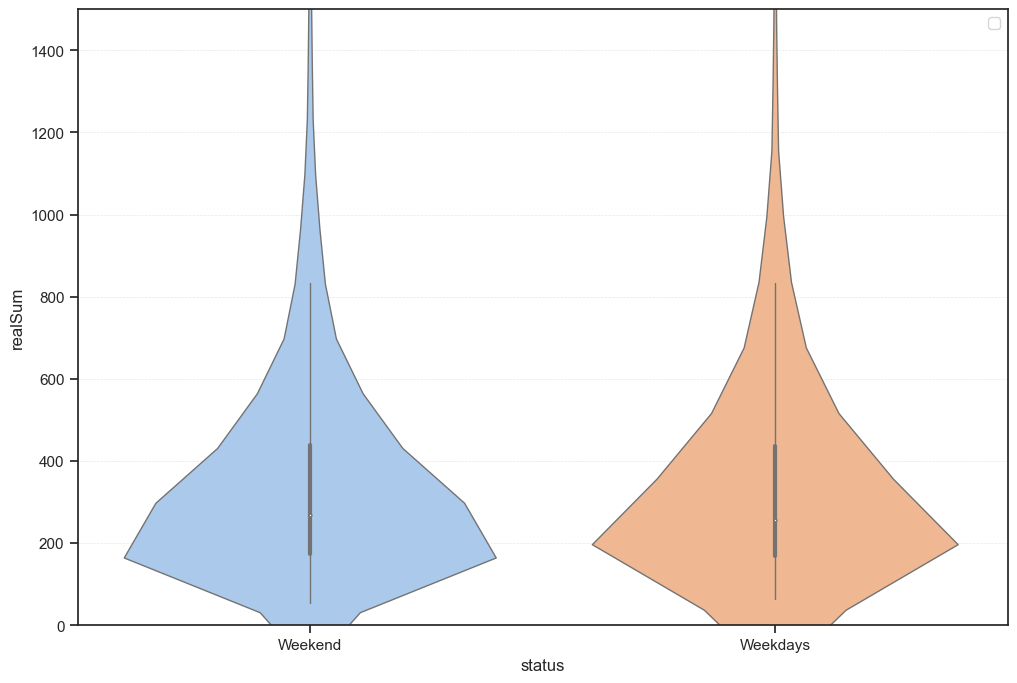

<Figure size 640x480 with 0 Axes>

In [7]:
plt.figure(figsize=(12, 8))
ax = plt.subplot()
plt.axis([0,8,0,1500])
sns.set_theme(style='ticks', palette='pastel')
sns.violinplot(x="status", y="realSum", 
            data=df, fliersize=0.5, linewidth=1)
# ax.set_xticklabels(ranks)
plt.grid(axis='y', color='#E8E8E8', linestyle='--', linewidth=.5)
plt.legend(loc=1)
plt.show()
plt.clf()

- Harga dominan listing pada kedua status hampir sama dimana harga listing pada saat Weekend sedikit lebih tinggi dari Weekdays

In [16]:
# sns.violinplot(x = "bedrooms", y = "realSum", hue= "status", data = df)
# plt.show()

- Dari segi `bedrooms` secara garis besar harga baik Weekend dan Weekdays sama namun pada `bedrooms` dengan jumlah 3 untuk weekdays range harganya lebih tinggi dari weekend.

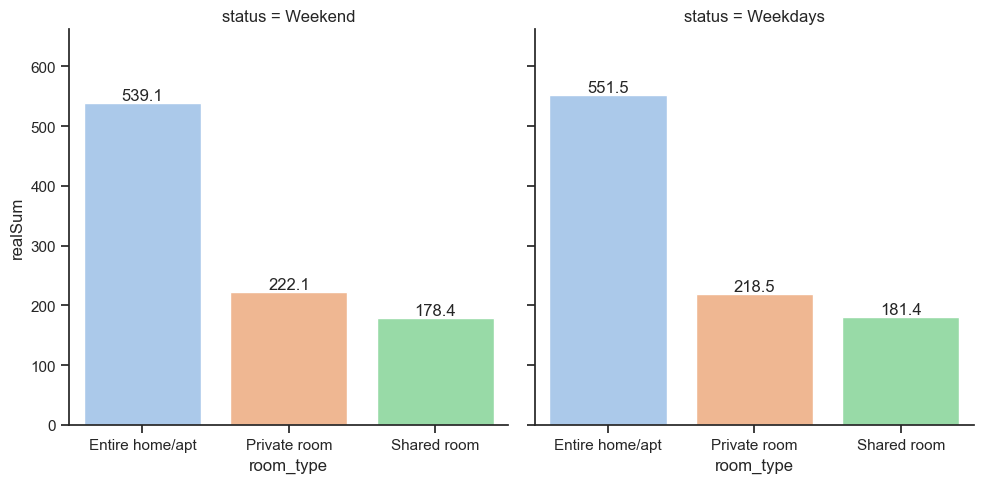

In [13]:
g = sns.catplot(x="room_type", y="realSum", 
            col="status",
            kind="bar", data=df, ci=None)

for ax in g.axes.ravel():
    
    # add annotations
    for c in ax.containers:
        labels = [f'{(v.get_height()):.1f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)



- Dari segi room_type kedua tidak jauh berbeda namun untuk Entire Home pada Weekdays sedikit lebih tinggi harganya.

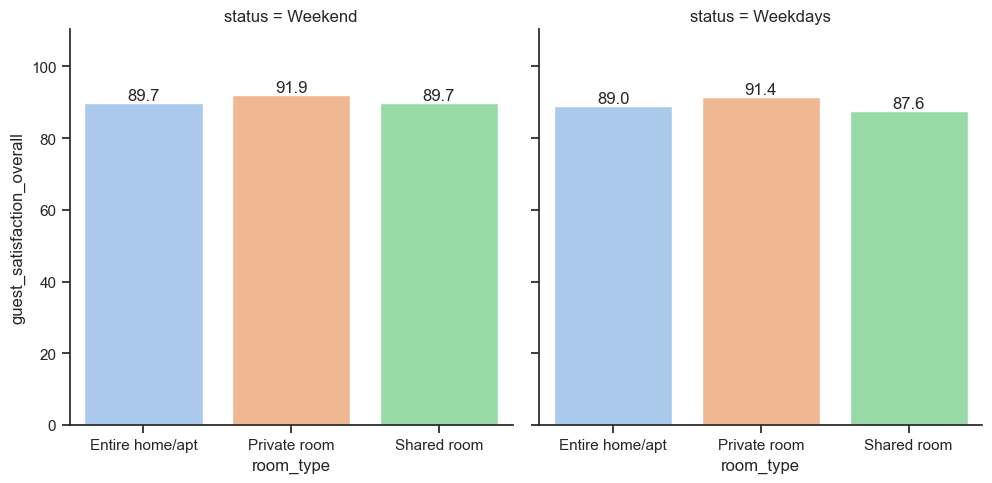

In [15]:
g= sns.catplot(x="room_type", y="guest_satisfaction_overall", 
            col="status",
            kind="bar", data=df, ci=None)

for ax in g.axes.ravel():
    
    # add annotations
    for c in ax.containers:
        labels = [f'{(v.get_height()):.1f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)

- Untuk semua room_type baik itu di Weekend dan Weekdays memiliki rata-rata `guest_satisfaction_overall` diatas 80 dan tidak terdapat perbedaan mencolok.

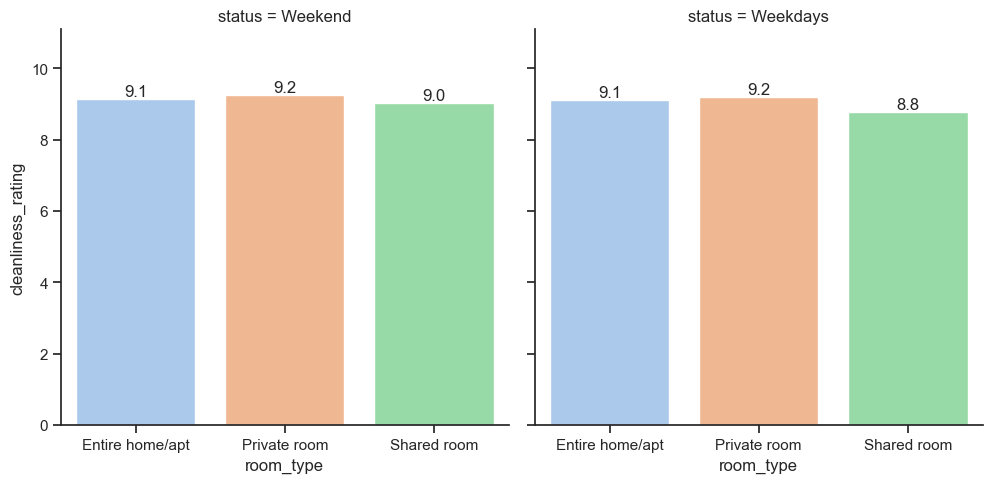

In [16]:
g= sns.catplot(x="room_type", y="cleanliness_rating", 
            col="status",
            kind="bar", data=df, ci=None)

for ax in g.axes.ravel():
    
    # add annotations
    for c in ax.containers:
        labels = [f'{(v.get_height()):.1f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)

plt.show()

- Untuk semua room_type baik itu di Weekend dan Weekdays memiliki rata-rata `cleanliness_rating` diatas 8 dan tidak terdapat perbedaan mencolok.

In [18]:
# g= sns.catplot(x="cleanliness_rating", 
#             col="status",
#             kind="count", data=df)

# for ax in g.axes.ravel():
    
#     # add annotations
#     for c in ax.containers:
#         labels = [f'{(v.get_height()):.1f}' for v in c]
#         ax.bar_label(c, labels=labels, label_type='edge')
#     ax.margins(y=0.2)
# plt.show()

- Kedua status memiliki total `cleanliness_rating` yang hampir sama namun untuk Weekend jumlah rating 9 dan 10 lebih banyak dari Weekdays

In [20]:
# g= sns.catplot(x="bedrooms", y="guest_satisfaction_overall", 
#             col="status",
#             kind="bar", data=df, ci= None)
# for ax in g.axes.ravel():
    
#     # add annotations
#     for c in ax.containers:
#         labels = [f'{(v.get_height()):.1f}' for v in c]
#         ax.bar_label(c, labels=labels, label_type='edge')
#     ax.margins(y=0.2)
# plt.show()

- Pada weekend `guest_satisfaction_overall` tertinggi ada pada bedrooms dengan jumlah 3 dan 5.
- Pada weekdays `guest_satisfaction_overall` tertinggi ada pada bedrooms dengan jumlah 3.

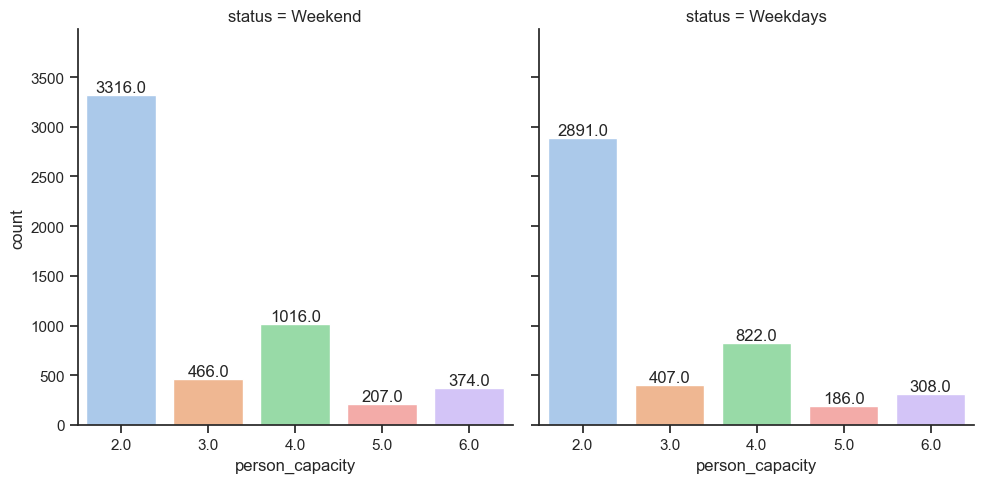

In [19]:
g= sns.catplot(x="person_capacity", 
            col="status",
            kind="count", data=df)

for ax in g.axes.ravel():
    
    # add annotations
    for c in ax.containers:
        labels = [f'{(v.get_height()):.1f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)
plt.show()

- Pada kedua status `person_capacity` terbanyak yang ada di tiap listing itu adalah berjumlah 2.

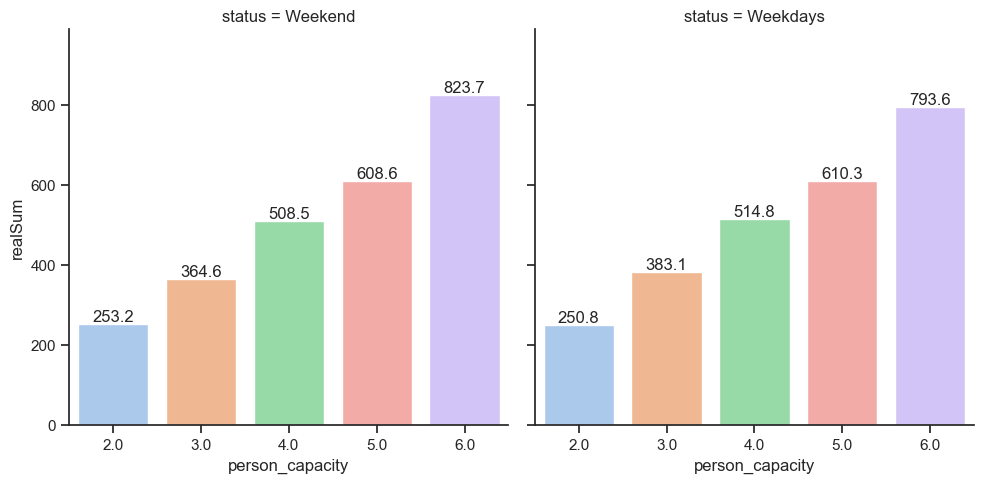

In [20]:
g= sns.catplot(x="person_capacity", y="realSum", 
            col="status",
            kind="bar", data=df, ci=None)
for ax in g.axes.ravel():
    
    # add annotations
    for c in ax.containers:
        labels = [f'{(v.get_height()):.1f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)
plt.show()

- Pada kedua status semakin besar `person_capacity` makin tinggi harga suatu listing.

In [19]:
# g= sns.catplot(x="bedrooms", y="realSum", 
#             col="status",
#             kind="bar", data=df, ci = None);
# for ax in g.axes.ravel():
    
#     # add annotations
#     for c in ax.containers:
#         labels = [f'{(v.get_height()):.1f}' for v in c]
#         ax.bar_label(c, labels=labels, label_type='edge')
#     ax.margins(y=0.2)
# plt.show()

- Dilihat dari harga `bedrooms`, kedua status memiliki harga yang sama persis urutan besarnya dengan tertinggi adalah `bedrooms` dengan jumlah 3.

### 3. Data Pre-Processing

In [5]:
df.replace({False: 0, True: 1},inplace=True)
df.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,status
0,388.061808,Entire home/apt,0,0,4.0,0,1,0,8.0,80.0,2,6.732503,2.022072,176.923962,12.298674,381.906786,6.835466,-0.05051,51.54512,Weekend
1,217.784990,Private room,0,1,2.0,0,1,0,9.0,93.0,2,6.948120,2.168112,182.474049,12.683974,353.311266,6.326333,-0.03810,51.48032,Weekdays
2,308.567934,Private room,0,1,4.0,0,0,1,9.0,90.0,0,4.913163,0.488135,286.846684,19.939031,575.069013,10.297091,-0.05760,51.51516,Weekdays
3,194.030904,Private room,0,1,2.0,0,1,0,9.0,89.0,1,6.360935,0.514938,206.000027,14.319865,523.235327,9.365001,-0.21908,51.50661,Weekend
4,439.568193,Entire home/apt,0,0,2.0,0,1,0,9.0,80.0,1,3.871620,1.222868,286.180624,19.893531,518.458762,9.279508,-0.09147,51.48178,Weekend


In [6]:
df = pd.get_dummies(df, columns=['room_type'])
df.head()

,realSum,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,...,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,status,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,388.061808,0,0,4.0,0,1,0,8.0,80.0,2,...,176.923962,12.298674,381.906786,6.835466,-0.05051,51.54512,Weekend,1,0,0
1,217.784990,0,1,2.0,0,1,0,9.0,93.0,2,...,182.474049,12.683974,353.311266,6.326333,-0.03810,51.48032,Weekdays,0,1,0
2,308.567934,0,1,4.0,0,0,1,9.0,90.0,0,...,286.846684,19.939031,575.069013,10.297091,-0.05760,51.51516,Weekdays,0,1,0
3,194.030904,0,1,2.0,0,1,0,9.0,89.0,1,...,206.000027,14.319865,523.235327,9.365001,-0.21908,51.50661,Weekend,0,1,0
4,439.568193,0,0,2.0,0,1,0,9.0,80.0,1,...,286.180624,19.893531,518.458762,9.279508,-0.09147,51.48178,Weekend,1,0,0


In [227]:
df.head() 

,realSum,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,...,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,status,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,388.061808,0,0,4.0,0,1,0,8.0,80.0,2,...,176.923962,12.298674,381.906786,6.835466,-0.05051,51.54512,Weekend,1,0,0
1,217.784990,0,1,2.0,0,1,0,9.0,93.0,2,...,182.474049,12.683974,353.311266,6.326333,-0.03810,51.48032,Weekdays,0,1,0
2,308.567934,0,1,4.0,0,0,1,9.0,90.0,0,...,286.846684,19.939031,575.069013,10.297091,-0.05760,51.51516,Weekdays,0,1,0
3,194.030904,0,1,2.0,0,1,0,9.0,89.0,1,...,206.000027,14.319865,523.235327,9.365001,-0.21908,51.50661,Weekend,0,1,0
4,439.568193,0,0,2.0,0,1,0,9.0,80.0,1,...,286.180624,19.893531,518.458762,9.279508,-0.09147,51.48178,Weekend,1,0,0


In [7]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['status']= label_encoder.fit_transform(df['status'])
df.head()

,realSum,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,...,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,status,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,388.061808,0,0,4.0,0,1,0,8.0,80.0,2,...,176.923962,12.298674,381.906786,6.835466,-0.05051,51.54512,1,1,0,0
1,217.784990,0,1,2.0,0,1,0,9.0,93.0,2,...,182.474049,12.683974,353.311266,6.326333,-0.03810,51.48032,0,0,1,0
2,308.567934,0,1,4.0,0,0,1,9.0,90.0,0,...,286.846684,19.939031,575.069013,10.297091,-0.05760,51.51516,0,0,1,0
3,194.030904,0,1,2.0,0,1,0,9.0,89.0,1,...,206.000027,14.319865,523.235327,9.365001,-0.21908,51.50661,1,0,1,0
4,439.568193,0,0,2.0,0,1,0,9.0,80.0,1,...,286.180624,19.893531,518.458762,9.279508,-0.09147,51.48178,1,1,0,0


In [8]:
df= df.drop(['attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm'], axis= 1)
df

,realSum,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,lng,lat,status,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,388.061808,0,0,4.0,0,1,0,8.0,80.0,2,6.732503,2.022072,-0.05051,51.54512,1,1,0,0
1,217.784990,0,1,2.0,0,1,0,9.0,93.0,2,6.948120,2.168112,-0.03810,51.48032,0,0,1,0
2,308.567934,0,1,4.0,0,0,1,9.0,90.0,0,4.913163,0.488135,-0.05760,51.51516,0,0,1,0
3,194.030904,0,1,2.0,0,1,0,9.0,89.0,1,6.360935,0.514938,-0.21908,51.50661,1,0,1,0
4,439.568193,0,0,2.0,0,1,0,9.0,80.0,1,3.871620,1.222868,-0.09147,51.48178,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,195.912416,0,1,2.0,1,0,0,10.0,99.0,1,6.376057,1.259077,-0.11725,51.45138,1,0,1,0
9989,154.989534,0,1,2.0,0,0,0,9.0,91.0,1,7.282685,1.750548,-0.18669,51.45430,1,0,1,0
9990,204.379219,0,1,2.0,0,0,1,8.0,84.0,1,8.652983,0.701585,-0.16900,51.43500,0,0,1,0
9991,1288.600390,0,1,2.0,0,1,0,9.0,97.0,1,4.954088,0.661841,-0.06452,51.52925,1,0,1,0


In [9]:
convert_dict = {'person_capacity': int
                }
df = df.astype(convert_dict)
df.dtypes

realSum                       float64
room_shared                     int64
room_private                    int64
person_capacity                 int32
host_is_superhost               int64
multi                           int64
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
lng                           float64
lat                           float64
status                          int32
room_type_Entire home/apt       uint8
room_type_Private room          uint8
room_type_Shared room           uint8
dtype: object

In [255]:
df['status'].value_counts()

1    5379
0    4614
Name: status, dtype: int64

### 4. Split Data

In [10]:
X = df.drop(['status'],axis=1)
y = df['status']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

### 5. Modelling

In [12]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [13]:
clf.score(X_test, y_test), clf.score(X_train, y_train) 

(0.34789859906604403, 1.0)

In [14]:
from sklearn.ensemble import AdaBoostClassifier
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=150,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [15]:
# Model Accuracy, how often is the classifier correct?
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.533689126084056


In [16]:
abc.score(X_test, y_test), abc.score(X_train, y_train)

(0.533689126084056, 0.5812723373838456)

In [17]:
#estimator_range = [2,4,6,8,10,12,14,16]
estimator_range = np.arange(1, 10, 1)

In [18]:
models = []
scores = []

for n_estimators in estimator_range:

    abc = AdaBoostClassifier(n_estimators=n_estimators,
                         learning_rate=1)

    # Fit the model
    abc.fit(X_train, y_train)

    # Append the model and score to their respective list
    models.append(abc)
    scores.append(accuracy_score(y_true = y_test, y_pred = abc.predict(X_test)))

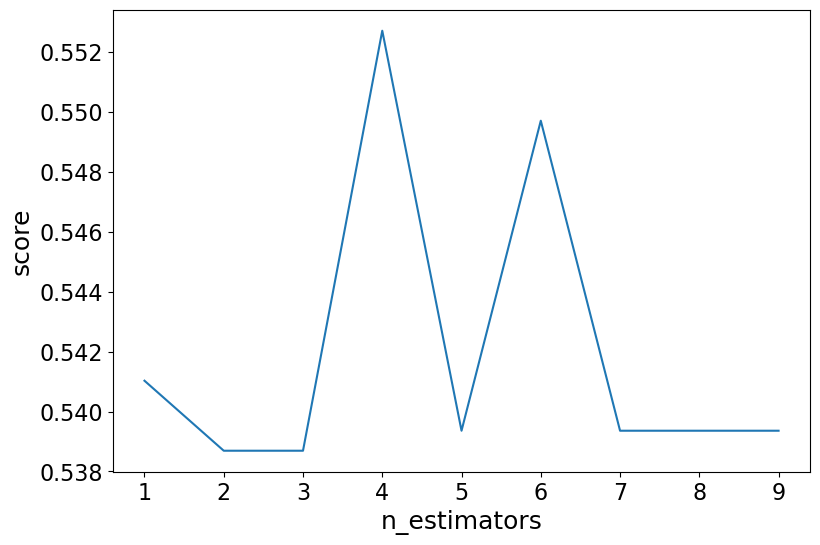

In [19]:
import matplotlib.pyplot as plt

# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()

In [20]:
from sklearn.ensemble import AdaBoostClassifier
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators= 4,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [21]:
abc.score(X_test, y_test), abc.score(X_train, y_train)

(0.5527018012008005, 0.5516797712651894)

[0.8  0.   0.   0.   0.02 0.02 0.02 0.   0.04 0.   0.04 0.02 0.02 0.02
 0.   0.   0.  ]


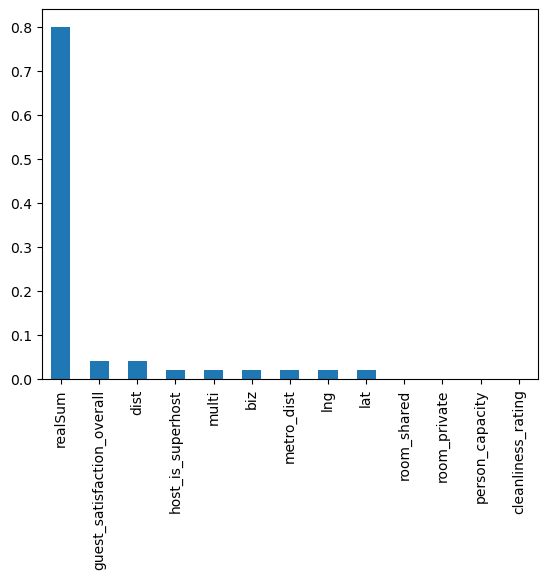

In [22]:
from sklearn.ensemble import ExtraTreesClassifier
model = AdaBoostClassifier()
model.fit(X, y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot.bar()
plt.show()
list1=feat_importances.keys().to_list()

- Berdasarkan grafik terlihat bahwa variabel independen yang paling berpengaruh terhadap klasifikasi status adalah `realSum` dengan nilai 0.8 jauh melaumpui variabel lainnya.

### 7. Kesimpulan

- Pada data ini metode Adaboost terbukti dapat meningkatkan performa dari algoritma Decision Tree dimana terjadi kenaikan sebesar 2% saat Adaboost diterapkan. 
- Selain mampu meningkatkan akurasi , penerapan Adaboost pada data ini terbukti menghasilkan performa yang imbang dan tidak terjadi overfitting.  
- Nilai n_estimators yang tepat berpengaruh terhadap kenaikan akurasi dan dapat mencegah overfitting.